### Assignment 1 on Intensity Transformations and Neighborhood Filtering

#### Q1

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

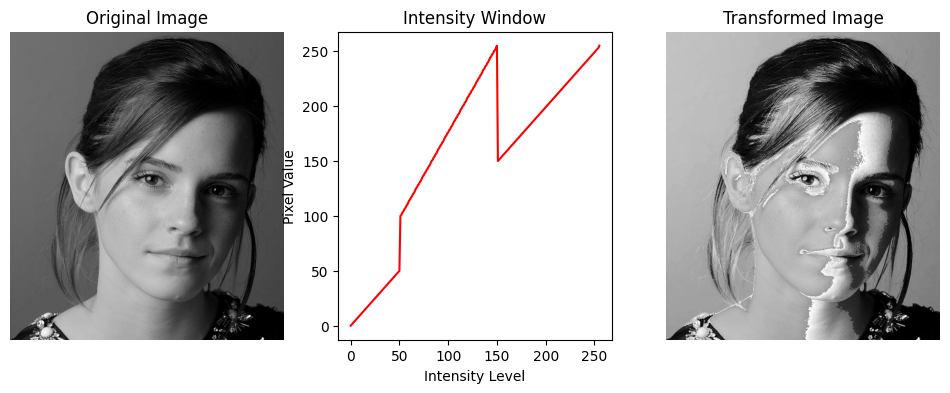

In [10]:
emma = cv.imread(r'D:\Academics\EN3160 - Image Processing and Machine Vision\images\emma.jpg', cv.IMREAD_GRAYSCALE)

assert emma is not None

t1 = np.linspace(0,50,51, dtype=np.uint8)
t2 = np.linspace(100,255,150-50, dtype=np.uint8)
t3  = np.linspace(150,255, 255-150, dtype=np.uint8)

intensity_window = np.concatenate((t1,t2,t3), axis=0)
transformed_emma = cv.LUT(emma, intensity_window)

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(emma, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].plot(intensity_window, 'r')
ax[1].set_title('Intensity Window')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Pixel Value')

ax[2].imshow(transformed_emma, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


#### Q2.

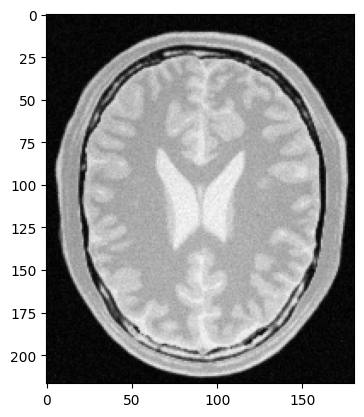

In [16]:
brain_im_path = r"D:\Academics\EN3160 - Image Processing and Machine Vision\assignments\Assignment 1\a1images\brain_proton_density_slice.png"
brain_image = cv.imread(brain_im_path, cv.IMREAD_GRAYSCALE)

plt.imshow(brain_image, cmap='gray')


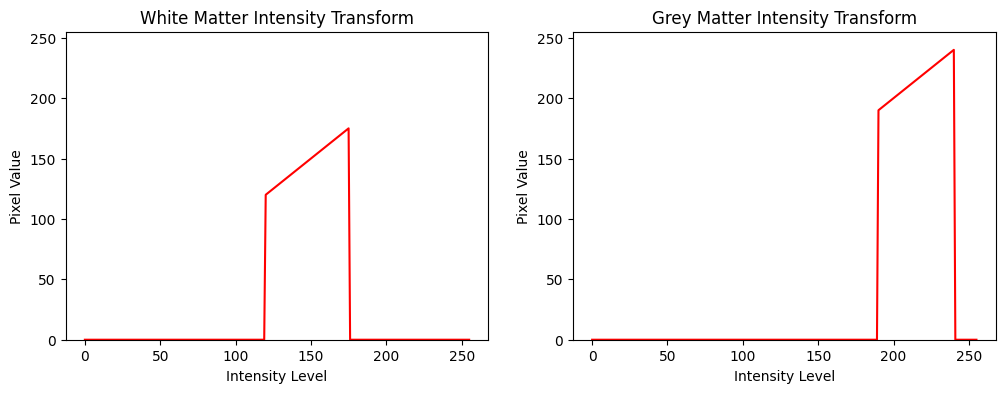

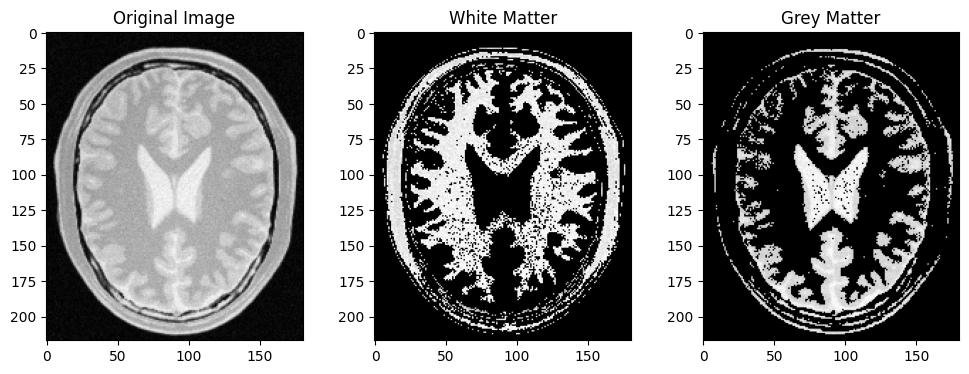

In [39]:
white_th = np.array([120,175], dtype=np.uint8)
grey_th = np.array([190,240], dtype=np.uint8)

white_matter_transform = np.zeros(256, dtype=np.uint8)
white_matter_transform[white_th[0]:white_th[1]+1] = np.linspace(white_th[0], white_th[1],white_th[1]-white_th[0]+1,dtype=np.uint8)

grey_matter_transform = np.zeros(256, dtype=np.uint8)
grey_matter_transform[grey_th[0]:grey_th[1]+1] = np.linspace(grey_th[0], grey_th[1],grey_th[1]-grey_th[0]+1,dtype=np.uint8)

white_matter = cv.LUT(brain_image, white_matter_transform)
grey_matter = cv.LUT(brain_image, grey_matter_transform)

#plot intensity transform functions
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(white_matter_transform, 'r')
ax[0].set_title('White Matter Intensity Transform')
ax[0].set_xlabel('Intensity Level')
ax[0].set_ylabel('Pixel Value')
ax[0].set_ylim([0,255])

ax[1].plot(grey_matter_transform, 'r')
ax[1].set_title('Grey Matter Intensity Transform')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Pixel Value')
ax[1].set_ylim([0,255])

#plot images

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(brain_image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(white_matter, cmap='gray')
ax[1].set_title('White Matter')

ax[2].imshow(grey_matter, cmap='gray')
ax[2].set_title('Grey Matter')

plt.show()

### Q3.

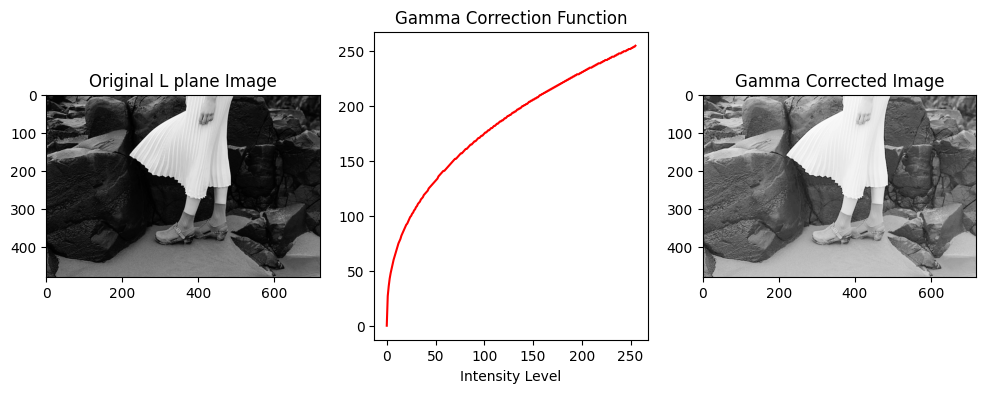

In [62]:
im3 = cv.imread(r"D:\Academics\EN3160 - Image Processing and Machine Vision\assignments\Assignment 1\a1images\highlights_and_shadows.jpg")

assert im3 is not None

#Apply gamma correction to the L plane in the L∗a∗b∗ color space and state the γ value.

lab_image = cv.cvtColor(im3, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab_image)

gamma = 0.4

gamma_func = np.array([((i/255.0)**gamma)*255 for i in np.arange(256)], dtype=np.uint8)

L_gamma_corrected = cv.LUT(L, gamma_func)

fig,ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(L, cmap='gray')
ax[0].set_title('Original L plane Image')

ax[1].plot(gamma_func, 'r')
ax[1].set_title('Gamma Correction Function')
ax[1].set_xlabel('Intensity Level')

ax[2].imshow(L_gamma_corrected, cmap='gray')
ax[2].set_title('Gamma Corrected Image')

plt.show()

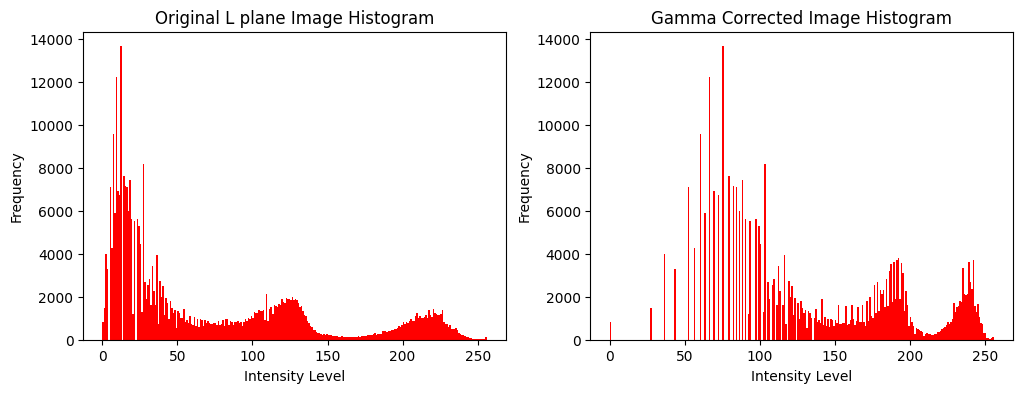

In [63]:
# show the histograms of the original and gamma corrected images

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].hist(L.flatten(), bins=256, range=(0,256), color='r')
ax[0].set_title('Original L plane Image Histogram')
ax[0].set_xlabel('Intensity Level')
ax[0].set_ylabel('Frequency')

ax[1].hist(L_gamma_corrected.flatten(), bins=256, range=(0,256), color='r')
ax[1].set_title('Gamma Corrected Image Histogram')
ax[1].set_xlabel('Intensity Level')
ax[1].set_ylabel('Frequency')

plt.show()

### Q4.